In [1]:
import requests
import pandas as pd
import numpy as np
import datetime

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [2]:
def getBoosterVersion(data):
    for x in data['rocket']:
       if x:
        response = requests.get("https://api.spacexdata.com/v4/rockets/"+str(x)).json()
        BoosterVersion.append(response['name'])

In [3]:
def getLaunchSite(data):
    for x in data['launchpad']:
       if x:
         response = requests.get("https://api.spacexdata.com/v4/launchpads/"+str(x)).json()
         Longitude.append(response['longitude'])
         Latitude.append(response['latitude'])
         LaunchSite.append(response['name'])

In [4]:
def getPayloadData(data):
    for load in data['payloads']:
       if load:
        response = requests.get("https://api.spacexdata.com/v4/payloads/"+load).json()
        PayloadMass.append(response['mass_kg'])
        Orbit.append(response['orbit'])

In [5]:
def getCoreData(data):
    for core in data['cores']:
            if core['core'] != None:
                response = requests.get("https://api.spacexdata.com/v4/cores/"+core['core']).json()
                Block.append(response['block'])
                ReusedCount.append(response['reuse_count'])
                Serial.append(response['serial'])
            else:
                Block.append(None)
                ReusedCount.append(None)
                Serial.append(None)
            Outcome.append(str(core['landing_success'])+' '+str(core['landing_type']))
            Flights.append(core['flight'])
            GridFins.append(core['gridfins'])
            Reused.append(core['reused'])
            Legs.append(core['legs'])
            LandingPad.append(core['landpad'])

In [6]:
spacex_url = "https://api.spacexdata.com/v4/launches/past"
response = requests.get(spacex_url)
response.json()

[{'fairings': {'reused': False,
   'recovery_attempt': False,
   'recovered': False,
   'ships': []},
  'links': {'patch': {'small': 'https://images2.imgbox.com/94/f2/NN6Ph45r_o.png',
    'large': 'https://images2.imgbox.com/5b/02/QcxHUb5V_o.png'},
   'reddit': {'campaign': None,
    'launch': None,
    'media': None,
    'recovery': None},
   'flickr': {'small': [], 'original': []},
   'presskit': None,
   'webcast': 'https://www.youtube.com/watch?v=0a_00nJ_Y88',
   'youtube_id': '0a_00nJ_Y88',
   'article': 'https://www.space.com/2196-spacex-inaugural-falcon-1-rocket-lost-launch.html',
   'wikipedia': 'https://en.wikipedia.org/wiki/DemoSat'},
  'static_fire_date_utc': '2006-03-17T00:00:00.000Z',
  'static_fire_date_unix': 1142553600,
  'net': False,
  'window': 0,
  'rocket': '5e9d0d95eda69955f709d1eb',
  'success': False,
  'failures': [{'time': 33,
    'altitude': None,
    'reason': 'merlin engine failure'}],
  'details': 'Engine failure at 33 seconds and loss of vehicle',
  'crew

In [7]:
print(response.content)

b'[{"fairings":{"reused":false,"recovery_attempt":false,"recovered":false,"ships":[]},"links":{"patch":{"small":"https://images2.imgbox.com/94/f2/NN6Ph45r_o.png","large":"https://images2.imgbox.com/5b/02/QcxHUb5V_o.png"},"reddit":{"campaign":null,"launch":null,"media":null,"recovery":null},"flickr":{"small":[],"original":[]},"presskit":null,"webcast":"https://www.youtube.com/watch?v=0a_00nJ_Y88","youtube_id":"0a_00nJ_Y88","article":"https://www.space.com/2196-spacex-inaugural-falcon-1-rocket-lost-launch.html","wikipedia":"https://en.wikipedia.org/wiki/DemoSat"},"static_fire_date_utc":"2006-03-17T00:00:00.000Z","static_fire_date_unix":1142553600,"net":false,"window":0,"rocket":"5e9d0d95eda69955f709d1eb","success":false,"failures":[{"time":33,"altitude":null,"reason":"merlin engine failure"}],"details":"Engine failure at 33 seconds and loss of vehicle","crew":[],"ships":[],"capsules":[],"payloads":["5eb0e4b5b6c3bb0006eeb1e1"],"launchpad":"5e9e4502f5090995de566f86","flight_number":1,"name

In [8]:
static_json_url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/API_call_spacex_api.json'

In [9]:
response.status_code

200

In [10]:
data = pd.json_normalize(response.json())
data.head()

,static_fire_date_utc,static_fire_date_unix,net,window,rocket,success,failures,details,crew,ships,capsules,payloads,launchpad,flight_number,name,date_utc,date_unix,date_local,date_precision,upcoming,cores,auto_update,tbd,launch_library_id,id,fairings.reused,fairings.recovery_attempt,fairings.recovered,fairings.ships,links.patch.small,links.patch.large,links.reddit.campaign,links.reddit.launch,links.reddit.media,links.reddit.recovery,links.flickr.small,links.flickr.original,links.presskit,links.webcast,links.youtube_id,links.article,links.wikipedia,fairings
0,2006-03-17T00:00:00.000Z,1.142554e+09,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 33, 'altitude': None, 'reason': 'merlin engine failure'}]",Engine failure at 33 seconds and loss of vehicle,[],[],[],[5eb0e4b5b6c3bb0006eeb1e1],5e9e4502f5090995de566f86,1,FalconSat,2006-03-24T22:30:00.000Z,1143239400,2006-03-25T10:30:00+12:00,hour,False,"[{'core': '5e9e289df35918033d3b2623', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",True,False,None,5eb87cd9ffd86e000604b32a,False,False,False,[],https://images2.imgbox.com/94/f2/NN6Ph45r_o.png,https://images2.imgbox.com/5b/02/QcxHUb5V_o.png,None,None,None,None,[],[],None,https://www.youtube.com/watch?v=0a_00nJ_Y88,0a_00nJ_Y88,https://www.space.com/2196-spacex-inaugural-falcon-1-rocket-lost-launch.html,https://en.wikipedia.org/wiki/DemoSat,NaN
1,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 301, 'altitude': 289, 'reason': 'harmonic oscillation leading to premature engine shutdown'}]","Successful first stage burn and transition to second stage, maximum altitude 289 km, Premature engine shutdown at T+7 min 30 s, Failed to reach orbit, Failed to recover first stage",[],[],[],[5eb0e4b6b6c3bb0006eeb1e2],5e9e4502f5090995de566f86,2,DemoSat,2007-03-21T01:10:00.000Z,1174439400,2007-03-21T13:10:00+12:00,hour,False,"[{'core': '5e9e289ef35918416a3b2624', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",True,False,None,5eb87cdaffd86e000604b32b,False,False,False,[],https://images2.imgbox.com/f9/4a/ZboXReNb_o.png,https://images2.imgbox.com/80/a2/bkWotCIS_o.png,None,None,None,None,[],[],None,https://www.youtube.com/watch?v=Lk4zQ2wP-Nc,Lk4zQ2wP-Nc,https://www.space.com/3590-spacex-falcon-1-rocket-fails-reach-orbit.html,https://en.wikipedia.org/wiki/DemoSat,NaN
2,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 140, 'altitude': 35, 'reason': 'residual stage-1 thrust led to collision between stage 1 and stage 2'}]",Residual stage 1 thrust led to collision between stage 1 and stage 2,[],[],[],"[5eb0e4b6b6c3bb0006eeb1e3, 5eb0e4b6b6c3bb0006eeb1e4]",5e9e4502f5090995de566f86,3,Trailblazer,2008-08-03T03:34:00.000Z,1217734440,2008-08-03T15:34:00+12:00,hour,False,"[{'core': '5e9e289ef3591814873b2625', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",True,False,None,5eb87cdbffd86e000604b32c,False,False,False,[],https://images2.imgbox.com/6c/cb/na1tzhHs_o.png,https://images2.imgbox.com/4a/80/k1oAkY0k_o.png,None,None,None,None,[],[],None,https://www.youtube.com/watch?v=v0w9p3U8860,v0w9p3U8860,http://www.spacex.com/news/2013/02/11/falcon-1-flight-3-mission-summary,https://en.wikipedia.org/wiki/Trailblazer_(satellite),NaN
3,2008-09-20T00:00:00.000Z,1.221869e+09,False,0.0,5e9d0d95eda69955f709d1eb,True,[],"Ratsat was carried to orbit on the first successful orbital launch of any privately funded and developed, liquid-propelled carrier rocket, the SpaceX Falcon 1",[],[],[],[5eb0e4b7b6c3bb0006eeb1e5],5e9e4502f5090995de566f86,4,RatSat,2008-09-28T23:15:00.000Z,1222643700,2008-09-28T11:15:00+12:00,hour,False,"[{'core': '5e9e289ef3591855dc3b2626', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': 

In [11]:
data = data[['rocket', 'payloads', 'launchpad', 'cores', 'flight_number', 'date_utc']]

# We will remove rows with multiple cores because those are falcon rockets with 2 extra rocket boosters and rows that have multiple payloads in a single rocket.
data = data[data['cores'].map(len)==1]
data = data[data['payloads'].map(len)==1]

# Since payloads and cores are lists of size 1 we will also extract the single value in the list and replace the feature.
data['cores'] = data['cores'].map(lambda x : x[0])
data['payloads'] = data['payloads'].map(lambda x : x[0])

# We also want to convert the date_utc to a datetime datatype and then extracting the date leaving the time
data['date'] = pd.to_datetime(data['date_utc']).dt.date

# Using the date we will restrict the dates of the launches
data = data[data['date'] <= datetime.date(2020, 11, 13)]

In [12]:
BoosterVersion = []
PayloadMass = []
Orbit = []
LaunchSite = []
Outcome = []
Flights = []
GridFins = []
Reused = []
Legs = []
LandingPad = []
Block = []
ReusedCount = []
Serial = []
Longitude = []
Latitude = []

In [13]:
BoosterVersion

[]

In [14]:
getBoosterVersion(data)

In [15]:
BoosterVersion[0:5]

['Falcon 1', 'Falcon 1', 'Falcon 1', 'Falcon 1', 'Falcon 9']

In [16]:
getLaunchSite(data)

In [17]:
getPayloadData(data)

In [18]:
getCoreData(data)

In [19]:
launch_dict = {'FlightNumber': list(data['flight_number']),
'Date': list(data['date']),
'BoosterVersion':BoosterVersion,
'PayloadMass':PayloadMass,
'Orbit':Orbit,
'LaunchSite':LaunchSite,
'Outcome':Outcome,
'Flights':Flights,
'GridFins':GridFins,
'Reused':Reused,
'Legs':Legs,
'LandingPad':LandingPad,
'Block':Block,
'ReusedCount':ReusedCount,
'Serial':Serial,
'Longitude': Longitude,
'Latitude': Latitude}


In [20]:
launch_df = pd.DataFrame(launch_dict)


In [21]:
launch_df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2006-03-24,Falcon 1,20.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin1A,167.743129,9.047721
1,2,2007-03-21,Falcon 1,NaN,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin2A,167.743129,9.047721
2,4,2008-09-28,Falcon 1,165.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin2C,167.743129,9.047721
3,5,2009-07-13,Falcon 1,200.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin3C,167.743129,9.047721
4,6,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0003,-80.577366,28.561857


In [22]:
data_falcon9 = launch_df[launch_df['BoosterVersion'] != 'Falcon 1']

In [23]:
data_falcon9.loc[:,'FlightNumber'] = list(range(1, data_falcon9.shape[0]+1))
data_falcon9

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
4,1,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0003,-80.577366,28.561857
5,2,2012-05-22,Falcon 9,525.0,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0005,-80.577366,28.561857
6,3,2013-03-01,Falcon 9,677.0,ISS,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0007,-80.577366,28.561857
7,4,2013-09-29,Falcon 9,500.0,PO,VAFB SLC 4E,False Ocean,1,False,False,False,None,1.0,0,B1003,-120.610829,34.632093
8,5,2013-12-03,Falcon 9,3170.0,GTO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B1004,-80.577366,28.561857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,86,2020-09-03,Falcon 9,15600.0,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1060,-80.603956,28.608058
90,87,2020-10-06,Falcon 9,15600.0,VLEO,KSC LC 39A,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,13,B1058,-80.603956,28.608058
91,88,2020-10-18,Falcon 9,15600.0,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1051,-80.603956,28.608058
92,89,2020-10-24,Falcon 9,15600.0,VLEO,CCSFS SLC 40,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,12,B1060,-80.577366,28.561857


In [24]:
data_falcon9.isnull().sum()

FlightNumber       0
Date               0
BoosterVersion     0
PayloadMass        5
Orbit              0
LaunchSite         0
Outcome            0
Flights            0
GridFins           0
Reused             0
Legs               0
LandingPad        26
Block              0
ReusedCount        0
Serial             0
Longitude          0
Latitude           0
dtype: int64

In [25]:
mean_payload_mass = data_falcon9['PayloadMass'].mean()
data_falcon9['PayloadMass'].fillna(mean_payload_mass, inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18888\3366110249.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_falcon9['PayloadMass'].fillna(mean_payload_mass, inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18888\3366110249.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_falcon9['PayloadMass'].fillna(mean_payload_mass,

In [26]:
data_falcon9.to_csv('dataset_part_1.csv', index=False)

In [27]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_1.csv")
df.head(10)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857
5,6,2014-01-06,Falcon 9,3325.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1005,-80.577366,28.561857
6,7,2014-04-18,Falcon 9,2296.000000,ISS,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1006,-80.577366,28.561857
7,8,2014-07-14,Falcon 9,1316.000000,LEO,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1007,-80.577366,28.561857
8,9,2014-08-05,Falcon 9,4535.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1008,-80.577366,28.561857
9,10,2014-09-07,Falcon 9,4428.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1011,-80.577366,28.561857


In [28]:
df.isnull().sum()/len(df)*100

FlightNumber       0.000000
Date               0.000000
BoosterVersion     0.000000
PayloadMass        0.000000
Orbit              0.000000
LaunchSite         0.000000
Outcome            0.000000
Flights            0.000000
GridFins           0.000000
Reused             0.000000
Legs               0.000000
LandingPad        28.888889
Block              0.000000
ReusedCount        0.000000
Serial             0.000000
Longitude          0.000000
Latitude           0.000000
dtype: float64

In [29]:
df.dtypes

FlightNumber        int64
Date               object
BoosterVersion     object
PayloadMass       float64
Orbit              object
LaunchSite         object
Outcome            object
Flights             int64
GridFins             bool
Reused               bool
Legs                 bool
LandingPad         object
Block             float64
ReusedCount         int64
Serial             object
Longitude         float64
Latitude          float64
dtype: object

In [30]:
df["LaunchSite"].value_counts()

LaunchSite
CCAFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: count, dtype: int64

In [51]:
landing_outcomes = df["Outcome"].value_counts()
landing_outcomes

Outcome
True ASDS      41
None None      19
True RTLS      14
False ASDS      6
True Ocean      5
False Ocean     2
None ASDS       2
False RTLS      1
Name: count, dtype: int64

In [52]:
for i,Outcome in enumerate(landing_outcomes.keys()):
    print(i,Outcome)

0 True ASDS
1 None None
2 True RTLS
3 False ASDS
4 True Ocean
5 False Ocean
6 None ASDS
7 False RTLS


In [53]:
bad_outcomes=set(landing_outcomes.keys()[[1,3,5,6,7]])
bad_outcomes

{'False ASDS', 'False Ocean', 'False RTLS', 'None ASDS', 'None None'}

In [54]:
landing_class = [0 if outcome in bad_outcomes else 1 for outcome in df['Outcome']]

df['Class'] = landing_class

df[['Class']].head(8)

,Class
0,0
1,0
2,0
3,0
4,0
5,0
6,1
7,1


In [55]:
df.sample(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
15,16,2015-06-28,Falcon 9,2477.000000,ISS,CCAFS SLC 40,None ASDS,1,True,False,True,5e9e3032383ecb6bb234e7ca,1.0,0,B1018,-80.577366,28.561857,0
9,10,2014-09-07,Falcon 9,4428.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1011,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
21,22,2016-05-27,Falcon 9,3100.000000,GTO,CCAFS SLC 40,True ASDS,1,True,False,True,5e9e3032383ecb6bb234e7ca,2.0,1,B1023,-80.577366,28.561857,1
43,44,2018-01-08,Falcon 9,6104.959412,LEO,CCAFS SLC 40,True RTLS,1,True,False,True,5e9e3032383ecb267a34e7c7,4.0,1,B1043,-80.577366,28.561857,1


In [56]:
df["Class"].value_counts()

Class
1    60
0    30
Name: count, dtype: int64

In [57]:
df["Class"].mean()

0.6666666666666666

In [58]:
df.to_csv("dataset_part_2.csv", index=False)

In [59]:
df["Orbit"].value_counts()

Orbit
GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
ES-L1     1
HEO       1
SO        1
GEO       1
Name: count, dtype: int64

In [60]:
%load_ext sql

In [61]:
import csv, sqlite3

con = sqlite3.connect("my_data1.db")
cur = con.cursor()

In [62]:
%sql sqlite:///my_data1.db

In [75]:
df = pd.read_csv("C:/Users/ASUS/Downloads/Spacex.csv")
df.to_sql("SPACEXTBL", con, if_exists='replace', index=False,method="multi")

101

In [77]:
%sql DROP table SPACEXTABLE

 * sqlite:///my_data1.db
Done.


[]

In [78]:
%sql create table SPACEXTABLE as select * from SPACEXTBL where Date is not null

 * sqlite:///my_data1.db
Done.


[]

In [79]:
%sql select * from SPACEXTABLE

 * sqlite:///my_data1.db
Done.


Date,Time (UTC),Booster_Version,Launch_Site,Payload,PAYLOAD_MASS__KG_,Orbit,Customer,Mission_Outcome,Landing_Outcome
2010-06-04,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0,LEO,SpaceX,Success,Failure (parachute)
2010-12-08,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel of Brouere cheese",0,LEO (ISS),NASA (COTS) NRO,Success,Failure (parachute)
2012-05-22,7:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2,525,LEO (ISS),NASA (COTS),Success,No attempt
2012-10-08,0:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500,LEO (ISS),NASA (CRS),Success,No attempt
2013-03-01,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677,LEO (ISS),NASA (CRS),Success,No attempt
2013-09-29,16:00:00,F9 v1.1 B1003,VAFB SLC-4E,CASSIOPE,500,Polar LEO,MDA,Success,Uncontrolled (ocean)
2013-12-03,22:41:00,F9 v1.1,CCAFS LC-40,SES-8,3170,GTO,SES,Success,No attempt
2014-01-06,22:06:00,F9 v1.1,CCAFS LC-40,Thaicom 6,3325,GTO,Thaicom,Success,No attempt
2014-04-18,19:25:00,F9 v1.1,CCAFS LC-40,SpaceX CRS-3,2296,LEO (ISS),NASA (CRS),Success,Controlled (ocean)
2014-07-14,15:15:00,F9 v1.1,CCAFS LC-40,OG2 Mission 1 6 Orbcomm-OG2 satellites,1316,LEO,Orbcomm,Success,Controlled (ocean)


In [80]:
%sql select DISTINCT Launch_Site from SPACEXTABLE

 * sqlite:///my_data1.db
Done.


Launch_Site
CCAFS LC-40
VAFB SLC-4E
KSC LC-39A
CCAFS SLC-40


In [82]:
%sql SELECT * FROM SPACEXTABLE WHERE Launch_Site LIKE 'CCA%' LIMIT 5;

 * sqlite:///my_data1.db
Done.


Date,Time (UTC),Booster_Version,Launch_Site,Payload,PAYLOAD_MASS__KG_,Orbit,Customer,Mission_Outcome,Landing_Outcome
2010-06-04,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0,LEO,SpaceX,Success,Failure (parachute)
2010-12-08,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel of Brouere cheese",0,LEO (ISS),NASA (COTS) NRO,Success,Failure (parachute)
2012-05-22,7:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2,525,LEO (ISS),NASA (COTS),Success,No attempt
2012-10-08,0:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500,LEO (ISS),NASA (CRS),Success,No attempt
2013-03-01,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677,LEO (ISS),NASA (CRS),Success,No attempt


In [83]:
%sql SELECT SUM(PAYLOAD_MASS__KG_) AS PAYLOAD_MASS__KG_ FROM SPACEXTABLE WHERE Customer LIKE 'NASA (CRS)%';


 * sqlite:///my_data1.db
Done.


PAYLOAD_MASS__KG_
48213


In [93]:
%sql SELECT DISTINCT Landing_Outcome from SPACEXTABLE

 * sqlite:///my_data1.db
Done.


Landing_Outcome
Failure (parachute)
No attempt
Uncontrolled (ocean)
Controlled (ocean)
Failure (drone ship)
Precluded (drone ship)
Success (ground pad)
Success (drone ship)
Success
Failure


In [89]:
%sql SELECT AVG(PAYLOAD_MASS__KG_) AS average_payload_mass FROM SPACEXTABLE WHERE Booster_Version == 'F9 v1.1';


 * sqlite:///my_data1.db
Done.


average_payload_mass
2928.4


In [91]:
%sql SELECT MIN(Date) AS first_successful_landing_date FROM SPACEXTABLE WHERE Landing_Outcome = 'Success (ground pad)';

 * sqlite:///my_data1.db
Done.


first_successful_landing_date
2015-12-22


In [95]:
%sql SELECT Booster_Version FROM SPACEXTABLE WHERE Landing_Outcome = 'Success (drone ship)' AND PAYLOAD_MASS__KG_ > 4000 AND PAYLOAD_MASS__KG_ < 6000


 * sqlite:///my_data1.db
Done.


Booster_Version
F9 FT B1022
F9 FT B1026
F9 FT B1021.2
F9 FT B1031.2


In [100]:
%sql SELECT COUNT(CASE WHEN "Mission_Outcome" = 'Success' THEN 1 END) AS "Successful_Missions", COUNT(CASE WHEN "Mission_Outcome" != 'Success' THEN 1 END) AS "Failed_Missions" FROM SPACEXTABLE;


 * sqlite:///my_data1.db
Done.


Successful_Missions,Failed_Missions
98,3


In [102]:
%sql SELECT "Booster_Version" FROM SPACEXTABLE WHERE "PAYLOAD_MASS__KG_" = (SELECT MAX("PAYLOAD_MASS__KG_") FROM SPACEXTABLE);


 * sqlite:///my_data1.db
Done.


Booster_Version
F9 B5 B1048.4
F9 B5 B1049.4
F9 B5 B1051.3
F9 B5 B1056.4
F9 B5 B1048.5
F9 B5 B1051.4
F9 B5 B1049.5
F9 B5 B1060.2
F9 B5 B1058.3
F9 B5 B1051.6


In [103]:
%sql SELECT CASE SUBSTR("Date", 6, 2) WHEN '01' THEN 'January' WHEN '02' THEN 'February' WHEN '03' THEN 'March' WHEN '04' THEN 'April' WHEN '05' THEN 'May' WHEN '06' THEN 'June' WHEN '07' THEN 'July' WHEN '08' THEN 'August' WHEN '09' THEN 'September' WHEN '10' THEN 'October' WHEN '11' THEN 'November' WHEN '12' THEN 'December' ELSE 'Unknown' END AS month, "Landing_Outcome" AS landing_outcomes, "Booster_Version" AS booster_versions, "Launch_Site" AS launch_site FROM SPACEXTABLE WHERE SUBSTR("Date", 0, 5) = '2015' AND "Landing_Outcome" = 'Failure (drone ship)';


 * sqlite:///my_data1.db
Done.


month,landing_outcomes,booster_versions,launch_site
January,Failure (drone ship),F9 v1.1 B1012,CCAFS LC-40
April,Failure (drone ship),F9 v1.1 B1015,CCAFS LC-40


In [104]:
%sql SELECT "Landing_Outcome" AS landing_outcomes, COUNT(*) AS count FROM SPACEXTABLE WHERE "Date" BETWEEN '2010-06-04' AND '2017-03-20' GROUP BY "Landing_Outcome" ORDER BY count DESC;


 * sqlite:///my_data1.db
Done.


landing_outcomes,count
No attempt,10
Success (drone ship),5
Failure (drone ship),5
Success (ground pad),3
Controlled (ocean),3
Uncontrolled (ocean),2
Failure (parachute),2
Precluded (drone ship),1


In [106]:
%sql SELECT DISTINCT Launch_site from SPACEXTABLE

 * sqlite:///my_data1.db
Done.


Launch_Site
CCAFS LC-40
VAFB SLC-4E
KSC LC-39A
CCAFS SLC-40


In [6]:
!pip install piplite

ERROR: Could not find a version that satisfies the requirement piplite (from versions: none)
ERROR: No matching distribution found for piplite


In [14]:
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

In [15]:
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
df=pd.read_csv(URL)
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


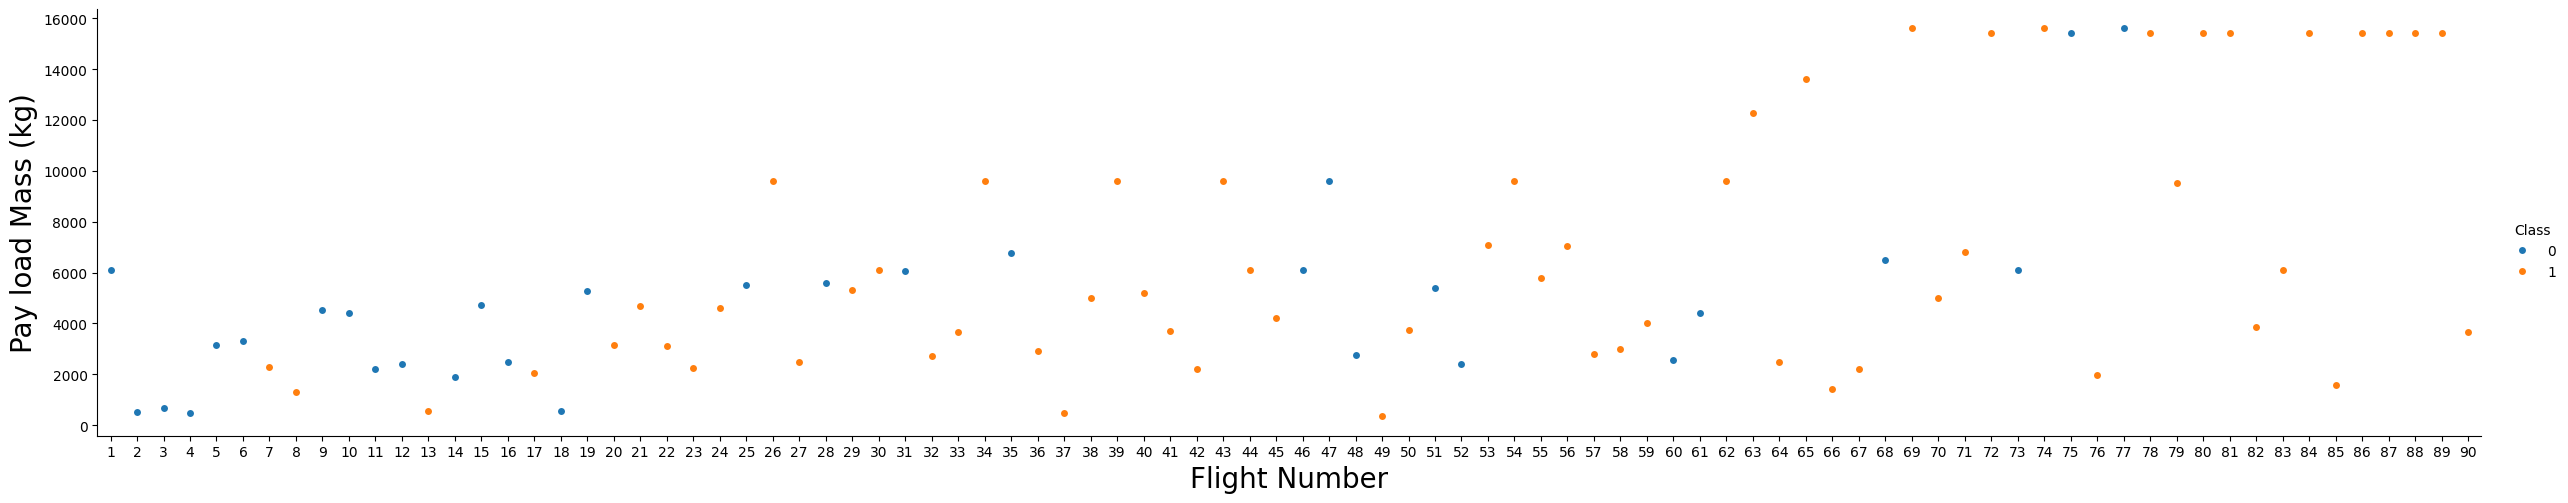

In [16]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

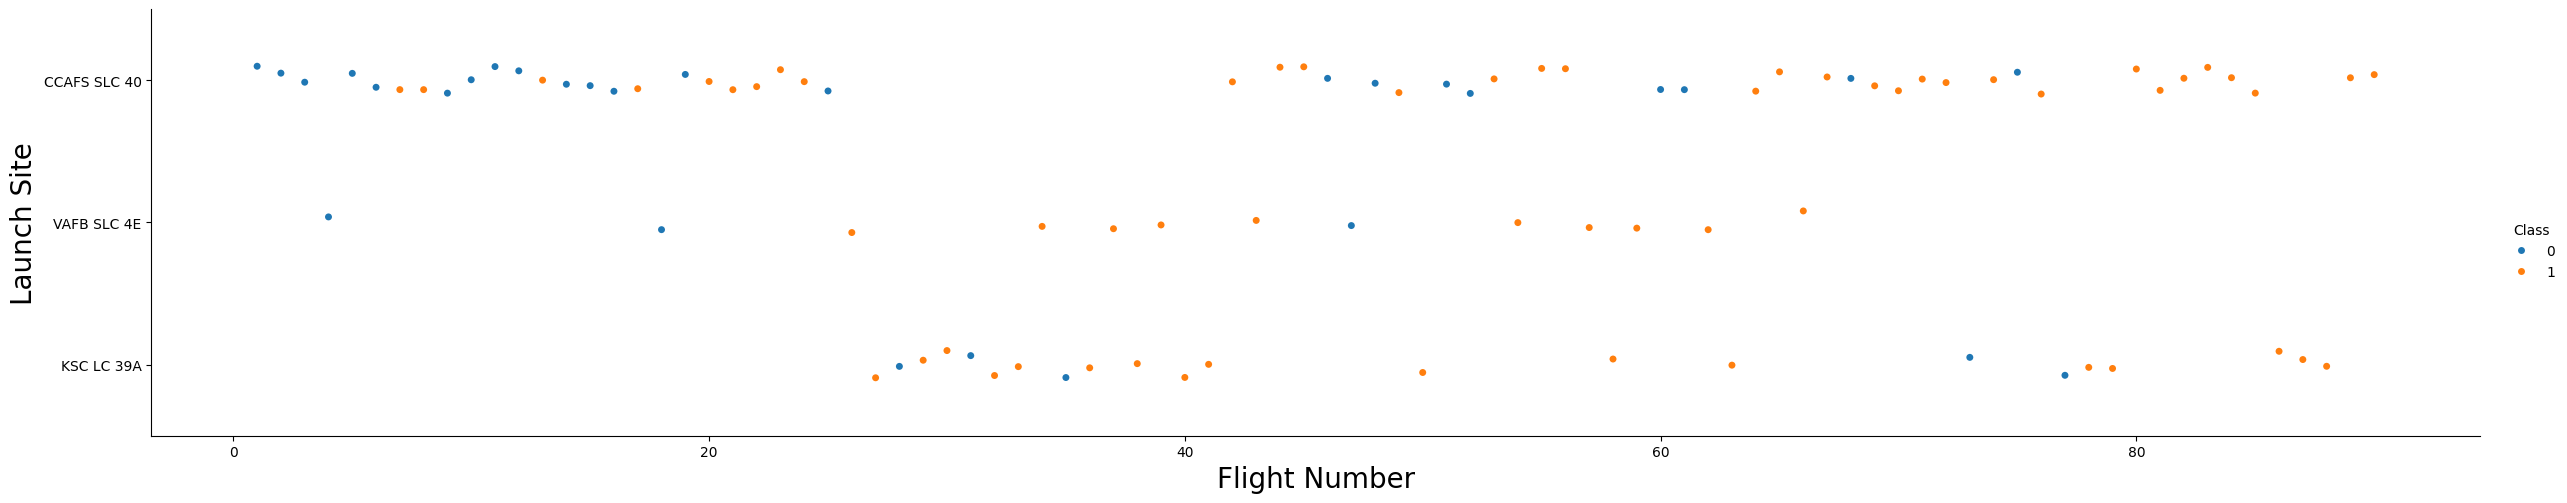

In [17]:
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

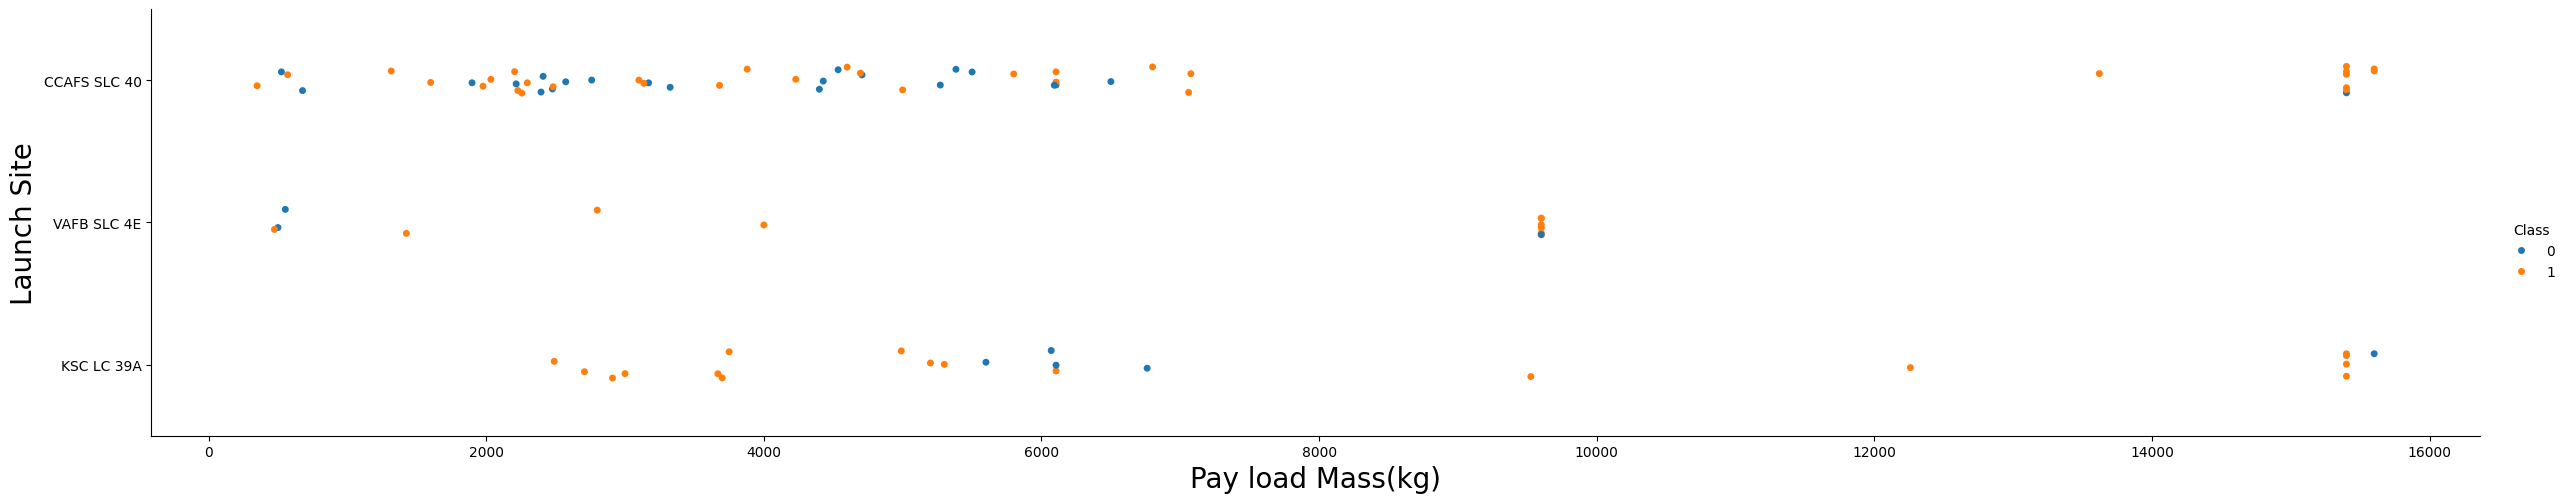

In [18]:
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df, aspect = 5)
plt.xlabel("Pay load Mass(kg)",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

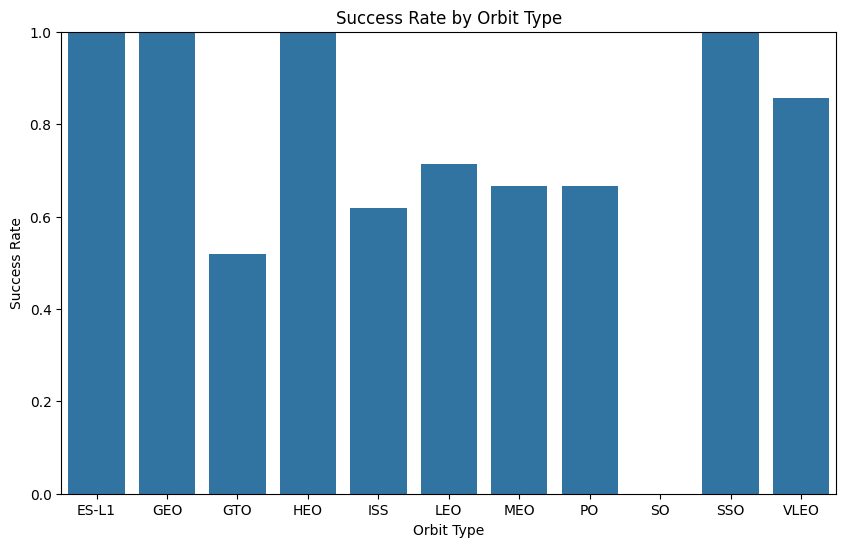

In [19]:

# Group by Orbit and calculate the mean of the Class column
orbit_success_rate = df.groupby('Orbit')['Class'].mean().reset_index()

# Rename columns for clarity
orbit_success_rate.columns = ['Orbit', 'SuccessRate']

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Orbit', y='SuccessRate', data=orbit_success_rate)
plt.title('Success Rate by Orbit Type')
plt.xlabel('Orbit Type')
plt.ylabel('Success Rate')
plt.ylim(0, 1)
plt.show()

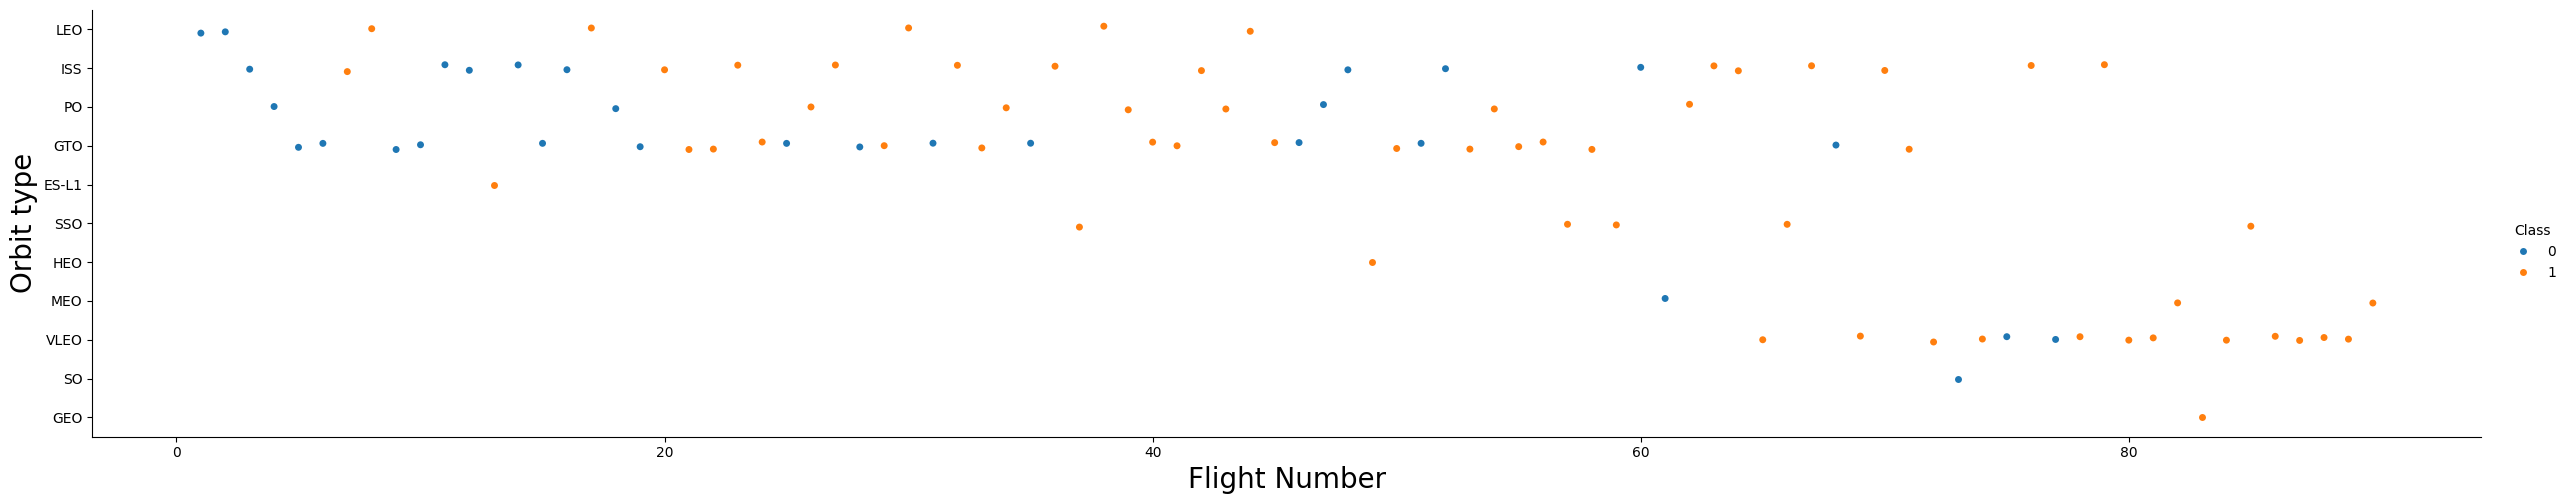

In [20]:
sns.catplot(y="Orbit", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Orbit type",fontsize=20)
plt.show()

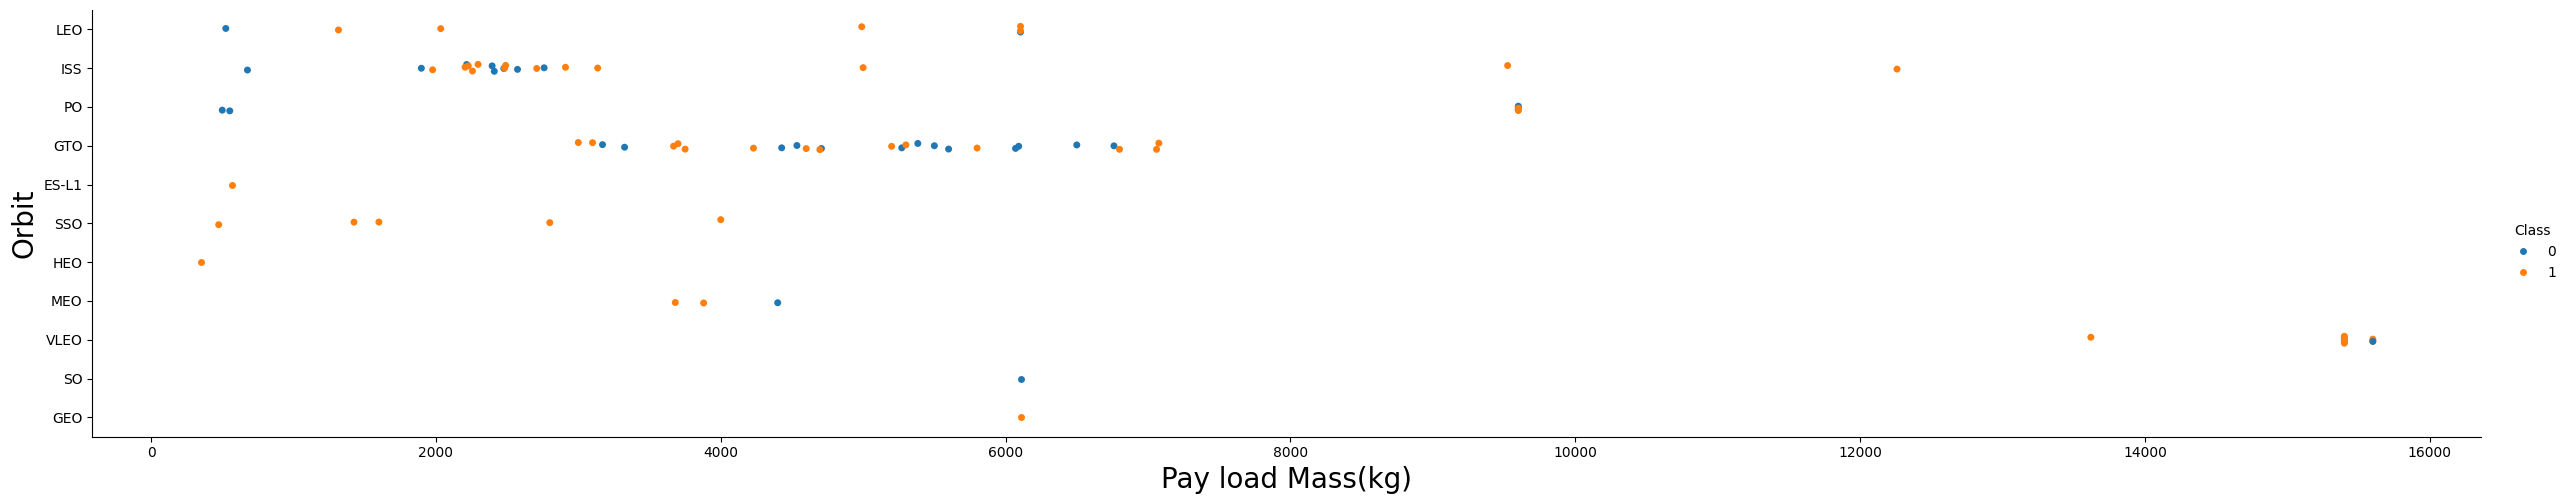

In [21]:
sns.catplot(y="Orbit", x="PayloadMass", hue="Class", data=df, aspect = 5)
plt.xlabel("Pay load Mass(kg)",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

In [22]:
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


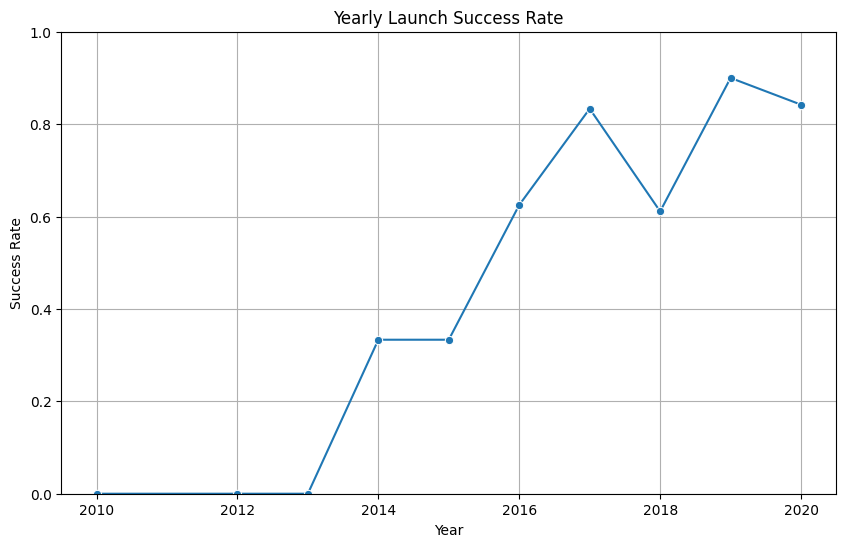

In [23]:
df['Year'] = pd.to_datetime(df['Date']).dt.year

# Group by Year and calculate the mean of the Class column to get the success rate
yearly_success_rate = df.groupby('Year')['Class'].mean().reset_index()

# Rename columns for clarity
yearly_success_rate.columns = ['Year', 'SuccessRate']

# Plot the line chart
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='SuccessRate', data=yearly_success_rate, marker='o')
plt.title('Yearly Launch Success Rate')
plt.xlabel('Year')
plt.ylabel('Success Rate')
plt.ylim(0, 1)
plt.grid(True)
plt.show()

In [24]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [25]:
categorical_columns = ['BoosterVersion', 'Orbit', 'LaunchSite', 'Outcome', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Serial']

# Use get_dummies() to create dummy variables for the categorical columns
df_dummies = pd.get_dummies(df, columns=categorical_columns)

# Show the first few rows of the dataframe with dummy variables
print(df_dummies.head())

   FlightNumber  Date  PayloadMass  Flights  Block  ReusedCount   Longitude  \
0             1  2010  6104.959412        1    1.0            0  -80.577366   
1             2  2012   525.000000        1    1.0            0  -80.577366   
2             3  2013   677.000000        1    1.0            0  -80.577366   
3             4  2013   500.000000        1    1.0            0 -120.610829   
4             5  2013  3170.000000        1    1.0            0  -80.577366   

    Latitude  Class  Year  ...  Serial_B1048  Serial_B1049  Serial_B1050  \
0  28.561857      0  2010  ...         False         False         False   
1  28.561857      0  2012  ...         False         False         False   
2  28.561857      0  2013  ...         False         False         False   
3  34.632093      0  2013  ...         False         False         False   
4  28.561857      0  2013  ...         False         False         False   

   Serial_B1051  Serial_B1054  Serial_B1056  Serial_B1058  Serial_B1

In [26]:
categorical_columns = ['BoosterVersion', 'Orbit', 'LaunchSite', 'Outcome', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Serial']

# Use get_dummies() to create dummy variables for the categorical columns
df_dummies = pd.get_dummies(df, columns=categorical_columns)

# Cast all numeric columns to float64
numeric_columns = df_dummies.select_dtypes(include=['int64', 'float64']).columns
df_dummies[numeric_columns] = df_dummies[numeric_columns].astype('float64')

# Show the first few rows of the dataframe with dummy variables and casted numeric columns
print(df_dummies.head())

   FlightNumber  Date  PayloadMass  Flights  Block  ReusedCount   Longitude  \
0           1.0  2010  6104.959412      1.0    1.0          0.0  -80.577366   
1           2.0  2012   525.000000      1.0    1.0          0.0  -80.577366   
2           3.0  2013   677.000000      1.0    1.0          0.0  -80.577366   
3           4.0  2013   500.000000      1.0    1.0          0.0 -120.610829   
4           5.0  2013  3170.000000      1.0    1.0          0.0  -80.577366   

    Latitude  Class  Year  ...  Serial_B1048  Serial_B1049  Serial_B1050  \
0  28.561857    0.0  2010  ...         False         False         False   
1  28.561857    0.0  2012  ...         False         False         False   
2  28.561857    0.0  2013  ...         False         False         False   
3  34.632093    0.0  2013  ...         False         False         False   
4  28.561857    0.0  2013  ...         False         False         False   

   Serial_B1051  Serial_B1054  Serial_B1056  Serial_B1058  Serial_B1

In [27]:
# Save the dataframe with dummy variables to a CSV file without the index
df_dummies.to_csv('dataset_part_3.csv', index=False)


In [28]:
import folium
import pandas as pd

In [29]:
# Import folium MarkerCluster plugin
from folium.plugins import MarkerCluster
# Import folium MousePosition plugin
from folium.plugins import MousePosition
# Import folium DivIcon plugin
from folium.features import DivIcon

In [30]:
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_geo.csv'
spacex_df=pd.read_csv(URL)
spacex_df.head()

,Flight Number,Date,Time (UTC),Booster Version,Launch Site,Payload,Payload Mass (kg),Orbit,Customer,Landing Outcome,class,Lat,Long
0,1,2010-06-04,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0.0,LEO,SpaceX,Failure (parachute),0,28.562302,-80.577356
1,2,2010-12-08,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel o...",0.0,LEO (ISS),NASA (COTS) NRO,Failure (parachute),0,28.562302,-80.577356
2,3,2012-05-22,7:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2+,525.0,LEO (ISS),NASA (COTS),No attempt,0,28.562302,-80.577356
3,4,2012-10-08,0:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500.0,LEO (ISS),NASA (CRS),No attempt,0,28.562302,-80.577356
4,5,2013-03-01,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677.0,LEO (ISS),NASA (CRS),No attempt,0,28.562302,-80.577356


In [31]:
# Select relevant sub-columns: `Launch Site`, `Lat(Latitude)`, `Long(Longitude)`, `class`
spacex_df = spacex_df[['Launch Site', 'Lat', 'Long', 'class']]
launch_sites_df = spacex_df.groupby(['Launch Site'], as_index=False).first()
launch_sites_df = launch_sites_df[['Launch Site', 'Lat', 'Long']]
launch_sites_df

,Launch Site,Lat,Long
0,CCAFS LC-40,28.562302,-80.577356
1,CCAFS SLC-40,28.563197,-80.576820
2,KSC LC-39A,28.573255,-80.646895
3,VAFB SLC-4E,34.632834,-120.610745


In [32]:
# Start location is NASA Johnson Space Center
nasa_coordinate = [29.559684888503615, -95.0830971930759]
site_map = folium.Map(location=nasa_coordinate, zoom_start=10)

In [33]:
# Create a blue circle at NASA Johnson Space Center's coordinate with a popup label showing its name
circle = folium.Circle(nasa_coordinate, radius=1000, color='#d35400', fill=True).add_child(folium.Popup('NASA Johnson Space Center'))
# Create a blue circle at NASA Johnson Space Center's coordinate with a icon showing its name
marker = folium.map.Marker(
    nasa_coordinate,
    # Create an icon as a text label
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % 'NASA JSC',
        )
    )
site_map.add_child(circle)
site_map.add_child(marker)

In [34]:
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
launch_map = folium.Map(location=map_center, zoom_start=5)

# Add markers to the map for each launch site
for _, row in df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['LaunchSite'],
        tooltip=row['LaunchSite']
    ).add_to(launch_map)

# Display the map
launch_map

In [35]:
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
launch_map = folium.Map(location=map_center, zoom_start=5)

# Add markers to the map for each launch site with success/failure color coding
for _, row in df.iterrows():
    color = 'green' if row['Class'] == 1 else 'red'
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['LaunchSite'],
        tooltip=f"{row['LaunchSite']} - {'Success' if row['Class'] == 1 else 'Failure'}",
        icon=folium.Icon(color=color)
    ).add_to(launch_map)

# Display the map
launch_map

In [36]:
spacex_df.tail(10)

,Launch Site,Lat,Long,class
46,KSC LC-39A,28.573255,-80.646895,1
47,KSC LC-39A,28.573255,-80.646895,1
48,KSC LC-39A,28.573255,-80.646895,1
49,CCAFS SLC-40,28.563197,-80.576820,1
50,CCAFS SLC-40,28.563197,-80.576820,1
51,CCAFS SLC-40,28.563197,-80.576820,0
52,CCAFS SLC-40,28.563197,-80.576820,0
53,CCAFS SLC-40,28.563197,-80.576820,0
54,CCAFS SLC-40,28.563197,-80.576820,1
55,CCAFS SLC-40,28.563197,-80.576820,0


In [37]:
marker_cluster = MarkerCluster()


In [38]:
def set_marker_color(cls):
    return 'green' if cls == 1 else 'red'

# Apply the function to create the marker_color column
df['marker_color'] = df['Class'].apply(set_marker_color)

# Display the DataFrame with the new column
print(df[['LaunchSite', 'Class', 'marker_color']])

      LaunchSite  Class marker_color
0   CCAFS SLC 40      0          red
1   CCAFS SLC 40      0          red
2   CCAFS SLC 40      0          red
3    VAFB SLC 4E      0          red
4   CCAFS SLC 40      0          red
..           ...    ...          ...
85    KSC LC 39A      1        green
86    KSC LC 39A      1        green
87    KSC LC 39A      1        green
88  CCAFS SLC 40      1        green
89  CCAFS SLC 40      1        green

[90 rows x 3 columns]


In [39]:
spacex_df.head()

,Launch Site,Lat,Long,class
0,CCAFS LC-40,28.562302,-80.577356,0
1,CCAFS LC-40,28.562302,-80.577356,0
2,CCAFS LC-40,28.562302,-80.577356,0
3,CCAFS LC-40,28.562302,-80.577356,0
4,CCAFS LC-40,28.562302,-80.577356,0


In [40]:
def set_marker_color(cls):
    return 'green' if cls == 1 else 'red'

# Apply the function to create the marker_color column
spacex_df['marker_color'] = spacex_df['class'].apply(set_marker_color)

# Create a folium map centered at an average location
map_center = [spacex_df['Lat'].mean(), spacex_df['Long'].mean()]
site_map = folium.Map(location=map_center, zoom_start=5)

# Create a MarkerCluster object
marker_cluster = MarkerCluster().add_to(site_map)

# Add markers to the marker cluster for each launch result
for index, record in spacex_df.iterrows():
    marker = folium.Marker(
        location=[record['Lat'], record['Long']],
        popup=record['Launch Site'],
        tooltip=f"{record['Launch Site']} - {'Success' if record['class'] == 1 else 'Failure'}",
        icon=folium.Icon(color='white', icon_color=record['marker_color'])
    )
    marker_cluster.add_child(marker)

# Add the marker cluster to the map
site_map.add_child(marker_cluster)

# Display the map
site_map

task 3

In [41]:
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of the Earth in kilometers
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c
    return distance

# Define a list of proximities (latitude and longitude)
proximities = {
    "Proximity1": (28.562302, -80.577356),  # Example proximity point
    "Proximity2": (34.633204, -120.610745)  # Another example proximity point
}

# Calculate distances for each launch site to each proximity
for prox_name, (prox_lat, prox_lon) in proximities.items():
    spacex_df[prox_name + '_Distance'] = spacex_df.apply(lambda row: haversine(row['Lat'], row['Long'], prox_lat, prox_lon), axis=1)

# Display the DataFrame with the calculated distances
print(spacex_df[['Launch Site', 'Lat', 'Long', 'Proximity1_Distance', 'Proximity2_Distance']])

     Launch Site        Lat        Long  Proximity1_Distance  \
0    CCAFS LC-40  28.562302  -80.577356             0.000047   
1    CCAFS LC-40  28.562302  -80.577356             0.000047   
2    CCAFS LC-40  28.562302  -80.577356             0.000047   
3    CCAFS LC-40  28.562302  -80.577356             0.000047   
4    CCAFS LC-40  28.562302  -80.577356             0.000047   
5    CCAFS LC-40  28.562302  -80.577356             0.000047   
6    CCAFS LC-40  28.562302  -80.577356             0.000047   
7    CCAFS LC-40  28.562302  -80.577356             0.000047   
8    CCAFS LC-40  28.562302  -80.577356             0.000047   
9    CCAFS LC-40  28.562302  -80.577356             0.000047   
10   CCAFS LC-40  28.562302  -80.577356             0.000047   
11   CCAFS LC-40  28.562302  -80.577356             0.000047   
12   CCAFS LC-40  28.562302  -80.577356             0.000047   
13   CCAFS LC-40  28.562302  -80.577356             0.000047   
14   CCAFS LC-40  28.562302  -80.577356 

In [42]:
formatter = "function(num) {return L.Util.formatNum(num, 5);};"
mouse_position = MousePosition(
    position='topright',
    separator=' Long: ',
    empty_string='NaN',
    lng_first=False,
    num_digits=20,
    prefix='Lat:',
    lat_formatter=formatter,
    lng_formatter=formatter,
)

site_map.add_child(mouse_position)
site_map

In [43]:
from math import sin, cos, sqrt, atan2, radians

def calculate_distance(lat1, lon1, lat2, lon2):
    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

In [45]:
import pandas as pd

# Create a folium map centered at an average location
map_center = [spacex_df['Lat'].mean(), spacex_df['Long'].mean()]
site_map = folium.Map(location=map_center, zoom_start=5)

# Add MousePosition plugin to get the coordinates on click
MousePosition().add_to(site_map)

# Display the map
site_map

In [49]:
import numpy as np

# Define the Haversine function to calculate the distance between two points on the Earth
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of the Earth in kilometers
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c
    return distance

# Coordinates of the closest coastline point (obtained from MousePosition)
coast_lat = 28.56367
coast_lon = -80.57163

# Calculate distance for each launch site to the coastline point
spacex_df['Distance_to_Coast'] = spacex_df.apply(lambda row: haversine(row['Lat'], row['Long'], coast_lat, coast_lon), axis=1)

# Display the DataFrame with the calculated distances to the coastline
print(spacex_df[['Launch Site', 'Lat', 'Long', 'Distance_to_Coast']])


     Launch Site        Lat        Long  Distance_to_Coast
0    CCAFS LC-40  28.562302  -80.577356           0.579576
1    CCAFS LC-40  28.562302  -80.577356           0.579576
2    CCAFS LC-40  28.562302  -80.577356           0.579576
3    CCAFS LC-40  28.562302  -80.577356           0.579576
4    CCAFS LC-40  28.562302  -80.577356           0.579576
5    CCAFS LC-40  28.562302  -80.577356           0.579576
6    CCAFS LC-40  28.562302  -80.577356           0.579576
7    CCAFS LC-40  28.562302  -80.577356           0.579576
8    CCAFS LC-40  28.562302  -80.577356           0.579576
9    CCAFS LC-40  28.562302  -80.577356           0.579576
10   CCAFS LC-40  28.562302  -80.577356           0.579576
11   CCAFS LC-40  28.562302  -80.577356           0.579576
12   CCAFS LC-40  28.562302  -80.577356           0.579576
13   CCAFS LC-40  28.562302  -80.577356           0.579576
14   CCAFS LC-40  28.562302  -80.577356           0.579576
15   CCAFS LC-40  28.562302  -80.577356           0.5795

In [51]:
# Coordinates of the closest coastline point (obtained from MousePosition)
coast_lat = 28.56367
coast_lon = -80.57163

# Choose a launch site for demonstration (e.g., the first launch site)
launch_site_lat = spacex_df.iloc[0]['Lat']
launch_site_lon = spacex_df.iloc[0]['Long']

# Create a folium map centered at the launch site
site_map = folium.Map(location=[launch_site_lat, launch_site_lon], zoom_start=13)

# Add launch site marker
folium.Marker([launch_site_lat, launch_site_lon], popup="Launch Site").add_to(site_map)

# Add coastline marker
folium.Marker([coast_lat, coast_lon], popup="Closest Coastline", icon=folium.Icon(color='blue')).add_to(site_map)

# Draw a PolyLine between the launch site and the coastline point
folium.PolyLine(
    locations=[[launch_site_lat, launch_site_lon], [coast_lat, coast_lon]],
    color='green',
    weight=2.5,
    opacity=1
).add_to(site_map)

# Display the map
site_map


In [53]:
coast_lat = 28.56367
coast_lon = -80.57163

# Choose a launch site for demonstration (e.g., the first launch site)
launch_site_lat = spacex_df.iloc[0]['Lat']
launch_site_lon = spacex_df.iloc[0]['Long']

# Create a folium map centered at the launch site
site_map = folium.Map(location=[launch_site_lat, launch_site_lon], zoom_start=13)

# Add launch site marker
folium.Marker([launch_site_lat, launch_site_lon], popup="Launch Site").add_to(site_map)

# Add coastline marker
folium.Marker([coast_lat, coast_lon], popup="Closest Coastline", icon=folium.Icon(color='blue')).add_to(site_map)

# Create a PolyLine object using the coastline and launch site coordinates
coordinates = [[launch_site_lat, launch_site_lon], [coast_lat, coast_lon]]
lines = folium.PolyLine(locations=coordinates, weight=1)

# Add the PolyLine to the map
site_map.add_child(lines)

# Display the map
site_map

In [54]:
# Coordinates of the closest points (manually identified)
coast_lat = 28.56367
coast_lon = -80.57163
city_lat = 28.3922
city_lon = -80.6077
railway_lat = 28.5721
railway_lon = -80.5853
highway_lat = 28.5723
highway_lon = -80.6494

# Choose a launch site for demonstration (e.g., the first launch site)
launch_site_lat = spacex_df.iloc[0]['Lat']
launch_site_lon = spacex_df.iloc[0]['Long']

# Create a folium map centered at the launch site
site_map = folium.Map(location=[launch_site_lat, launch_site_lon], zoom_start=13)

# Add launch site marker
folium.Marker([launch_site_lat, launch_site_lon], popup="Launch Site").add_to(site_map)

# Add other points markers
folium.Marker([coast_lat, coast_lon], popup="Closest Coastline", icon=folium.Icon(color='blue')).add_to(site_map)
folium.Marker([city_lat, city_lon], popup="Closest City", icon=folium.Icon(color='purple')).add_to(site_map)
folium.Marker([railway_lat, railway_lon], popup="Closest Railway", icon=folium.Icon(color='orange')).add_to(site_map)
folium.Marker([highway_lat, highway_lon], popup="Closest Highway", icon=folium.Icon(color='red')).add_to(site_map)

# Create and add PolyLines between the launch site and other points
lines = [
    [[launch_site_lat, launch_site_lon], [coast_lat, coast_lon]],
    [[launch_site_lat, launch_site_lon], [city_lat, city_lon]],
    [[launch_site_lat, launch_site_lon], [railway_lat, railway_lon]],
    [[launch_site_lat, launch_site_lon], [highway_lat, highway_lon]]
]

for line in lines:
    folium.PolyLine(locations=line, weight=1).add_to(site_map)

# Display the map
site_map


In [8]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [9]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

In [10]:
import io

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
data = pd.read_csv(URL1)

In [11]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
X = pd.read_csv(URL2)

In [12]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [13]:
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [14]:
# Assuming data is your DataFrame
Y = data['Class'].to_numpy()


In [15]:
transform = StandardScaler()

# Standardize the data and reassign to X
X_new = transform.fit_transform(X)

# Convert the standardized data back to a DataFrame for better readability

# Print the standardized DataFrame
print(X)

    FlightNumber   PayloadMass  Flights  Block  ReusedCount  Orbit_ES-L1  \
0            1.0   6104.959412      1.0    1.0          0.0          0.0   
1            2.0    525.000000      1.0    1.0          0.0          0.0   
2            3.0    677.000000      1.0    1.0          0.0          0.0   
3            4.0    500.000000      1.0    1.0          0.0          0.0   
4            5.0   3170.000000      1.0    1.0          0.0          0.0   
..           ...           ...      ...    ...          ...          ...   
85          86.0  15400.000000      2.0    5.0          2.0          0.0   
86          87.0  15400.000000      3.0    5.0          2.0          0.0   
87          88.0  15400.000000      6.0    5.0          5.0          0.0   
88          89.0  15400.000000      3.0    5.0          2.0          0.0   
89          90.0   3681.000000      1.0    5.0          0.0          0.0   

    Orbit_GEO  Orbit_GTO  Orbit_HEO  Orbit_ISS  ...  Serial_B1058  \
0         0.0     

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [17]:
Y_test.shape

(18,)

In [18]:
parameters = {'C': [0.01, 0.1, 1],
              'penalty': ['l2'],
              'solver': ['lbfgs']}

# Create the logistic regression object
lr = LogisticRegression()

# Create the GridSearchCV object with cv=10
logreg_cv = GridSearchCV(estimator=lr, param_grid=parameters, cv=10, scoring='accuracy')

# Fit the GridSearchCV object to the training data
logreg_cv.fit(X_train, Y_train)

# Output the best parameters and the accuracy on the validation data


C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']},
             scoring='accuracy')

In [19]:
print("Tuned hyperparameters :(best parameters) ", logreg_cv.best_params_)
print("Accuracy :", logreg_cv.best_score_)

Tuned hyperparameters :(best parameters)  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy : 0.8196428571428571


Test accuracy: 0.8333333333333334


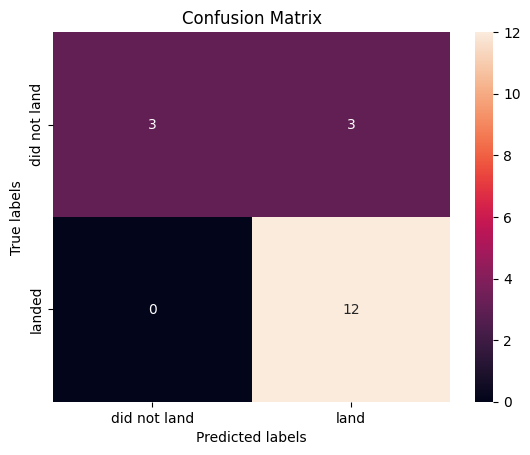

In [20]:
test_accuracy = logreg_cv.score(X_test, Y_test)
print("Test accuracy:", test_accuracy)

# Make predictions on the test data
yhat = logreg_cv.predict(X_test)

# Plot the confusion matrix
plot_confusion_matrix(Y_test, yhat)

In [ ]:
parameters = {
    'kernel': ('linear', 'rbf', 'poly', 'sigmoid'),
    'C': np.logspace(-3, 3, 5),
    'gamma': np.logspace(-3, 3, 5)
}

# Create the support vector machine object
svm = SVC()

# Create the GridSearchCV object with cv=10
svm_cv = GridSearchCV(estimator=svm, param_grid=parameters, cv=10, scoring='accuracy')

# Fit the GridSearchCV object to the training data
svm_cv.fit(X_test, Y_test)

# Output the best parameters and the accuracy on the validation data
print("Tuned hyperparameters :(best parameters) ", svm_cv.best_params_)
print("Accuracy :", svm_cv.best_score_)

# Calculate the accuracy on the test data
test_accuracy = svm_cv.score(X_test, Y_test)
print("Test accuracy:", test_accuracy)

# Make predictions on the test data
yhat = svm_cv.predict(X_test)

# Plot the confusion matrix
plot_confusion_matrix(Y_test, yhat)

In [21]:
X_train

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
30,31.0,6070.000000,1.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
27,28.0,5600.000000,1.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
44,45.0,4230.000000,2.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
35,36.0,2910.000000,1.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
57,58.0,3000.000000,2.0,5.0,2.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43,44.0,6104.959412,1.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
22,23.0,2257.000000,1.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
72,73.0,6104.959412,4.0,5.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
15,16.0,2477.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


In [22]:
Y_train

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1], dtype=int64)

In [23]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()


In [24]:
parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2*n for n in range(1, 10)],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}


In [25]:
from sklearn.model_selection import GridSearchCV

tree_cv = GridSearchCV(estimator=tree, param_grid=parameters, cv=10)


In [27]:
# Assuming you have your training data (X_train, y_train)
tree_cv.fit(X_train, Y_train)


C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [28]:
best_params = tree_cv.best_params_
print("Best parameters:", best_params)


Best parameters: {'criterion': 'entropy', 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'random'}


In [30]:
accuracy = tree_cv.score(X_test, Y_test)
print("Accuracy on test data:", accuracy)


Accuracy on test data: 0.8333333333333334


In [31]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'random'}
accuracy : 0.8732142857142856


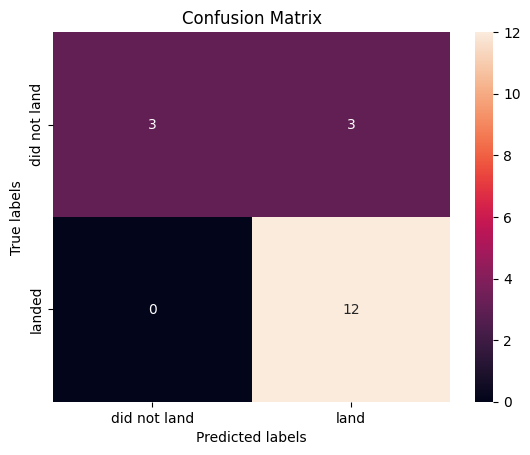

In [32]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [43]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()


In [44]:
parameters = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}


In [45]:
from sklearn.model_selection import GridSearchCV

knn_cv = GridSearchCV(estimator=KNN, param_grid=parameters, cv=10)


In [46]:
# Assuming you have your training data (X_train, y_train)
knn_cv.fit(X_train, Y_train)


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [47]:
best_params = knn_cv.best_params_
print("Best parameters:", best_params)


Best parameters: {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1}


In [48]:
accuracy = knn_cv.score(X_test, Y_test)
print("Accuracy on test data:", accuracy)


Accuracy on test data: 0.6111111111111112


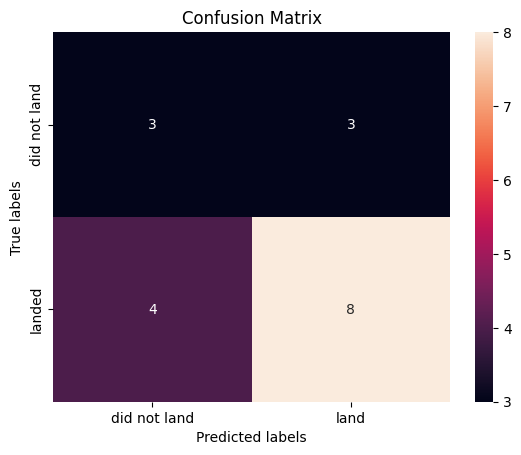

In [49]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [50]:
acc_knn = knn_cv.score(X_test, Y_test)
print("Accuracy on knn test data:", acc_knn)
acc_log = logreg_cv.score(X_test, Y_test)
print("Accuracy on knn test data:", acc_log)
acc_tree = tree_cv.score(X_test, Y_test)
print("Accuracy on knn test data:", acc_tree)


Accuracy on knn test data: 0.6111111111111112
Accuracy on knn test data: 0.8333333333333334
Accuracy on knn test data: 0.8333333333333334
